In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_env = "2107_environment_data.csv"
file_path_irr = "2107_irradiance_data.csv"
file_path_elec = "2107_electrical_data.csv"

# Leer los archivos CSV
df_env = pd.read_csv(file_path_env)
df_irr = pd.read_csv(file_path_irr)
df_elec = pd.read_csv(file_path_elec)

# Verificar la estructura de los datasets
df_env_info = df_env.info()
df_irr_info = df_irr.info()
df_elec_info = df_elec.info()

# Mostrar las primeras filas de cada dataset
df_env_head = df_env.head()
df_irr_head = df_irr.head()
df_elec_head = df_elec.head()

df_env_info, df_env_head, df_irr_info, df_irr_head, df_elec_info, df_elec_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206008 entries, 0 to 206007
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   measured_on                   206008 non-null  object 
 1   ambient_temperature_o_149575  205876 non-null  float64
 2   wind_speed_o_149576           205992 non-null  float64
 3   wind_direction_o_149577       206000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531019 entries, 0 to 531018
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   measured_on              531019 non-null  object 
 1   poa_irradiance_o_149574  531019 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632952 entries, 0 to 632951
Columns: 120 entri

(None,
            measured_on  ambient_temperature_o_149575  wind_speed_o_149576  \
 0  2017-12-01 00:00:00                          38.8                  1.2   
 1  2017-12-01 00:15:00                          38.8                  1.2   
 2  2017-12-01 00:30:00                          38.8                  1.2   
 3  2017-12-01 00:45:00                          38.8                  1.2   
 4  2017-12-01 01:00:00                          37.0                  2.6   
 
    wind_direction_o_149577  
 0                    156.0  
 1                    156.0  
 2                    156.0  
 3                    156.0  
 4                    247.0  ,
 None,
            measured_on  poa_irradiance_o_149574
 0  2017-11-01 07:10:00                      0.0
 1  2017-11-01 07:15:00                      0.0
 2  2017-11-01 07:20:00                      0.0
 3  2017-11-01 07:25:00                      0.0
 4  2017-11-01 09:00:00                    267.5,
 None,
            measured_on  inv_01_d

In [2]:
# Convertir la columna 'measured_on' a formato datetime
df_env['measured_on'] = pd.to_datetime(df_env['measured_on'])
df_irr['measured_on'] = pd.to_datetime(df_irr['measured_on'])
df_elec['measured_on'] = pd.to_datetime(df_elec['measured_on'])

# Establecer 'measured_on' como índice
df_env.set_index('measured_on', inplace=True)
df_irr.set_index('measured_on', inplace=True)
df_elec.set_index('measured_on', inplace=True)

# Rellenar valores faltantes con forward fill (ffill) y luego backward fill (bfill)
df_env.fillna(method='ffill', inplace=True)
df_env.fillna(method='bfill', inplace=True)
df_elec.fillna(method='ffill', inplace=True)
df_elec.fillna(method='bfill', inplace=True)

# Verificar valores nulos después del procesamiento
missing_values_env = df_env.isnull().sum()
missing_values_irr = df_irr.isnull().sum()
missing_values_elec = df_elec.isnull().sum()

missing_values_env, missing_values_irr, missing_values_elec


C:\Users\ericv\AppData\Local\Temp\ipykernel_171728\1084585113.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_env.fillna(method='ffill', inplace=True)
C:\Users\ericv\AppData\Local\Temp\ipykernel_171728\1084585113.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_env.fillna(method='bfill', inplace=True)
C:\Users\ericv\AppData\Local\Temp\ipykernel_171728\1084585113.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_elec.fillna(method='ffill', inplace=True)
C:\Users\ericv\AppData\Local\Temp\ipykernel_171728\1084585113.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_elec.fillna(method='bfill', inplace=

(ambient_temperature_o_149575    0
 wind_speed_o_149576             0
 wind_direction_o_149577         0
 dtype: int64,
 poa_irradiance_o_149574    0
 dtype: int64,
 inv_01_dc_current_inv_149579    0
 inv_01_dc_voltage_inv_149580    0
 inv_01_ac_current_inv_149581    0
 inv_01_ac_voltage_inv_149582    0
 inv_01_ac_power_inv_149583      0
                                ..
 inv_24_dc_current_inv_149694    0
 inv_24_dc_voltage_inv_149695    0
 inv_24_ac_current_inv_149696    0
 inv_24_ac_voltage_inv_149697    0
 inv_24_ac_power_inv_149698      0
 Length: 119, dtype: int64)

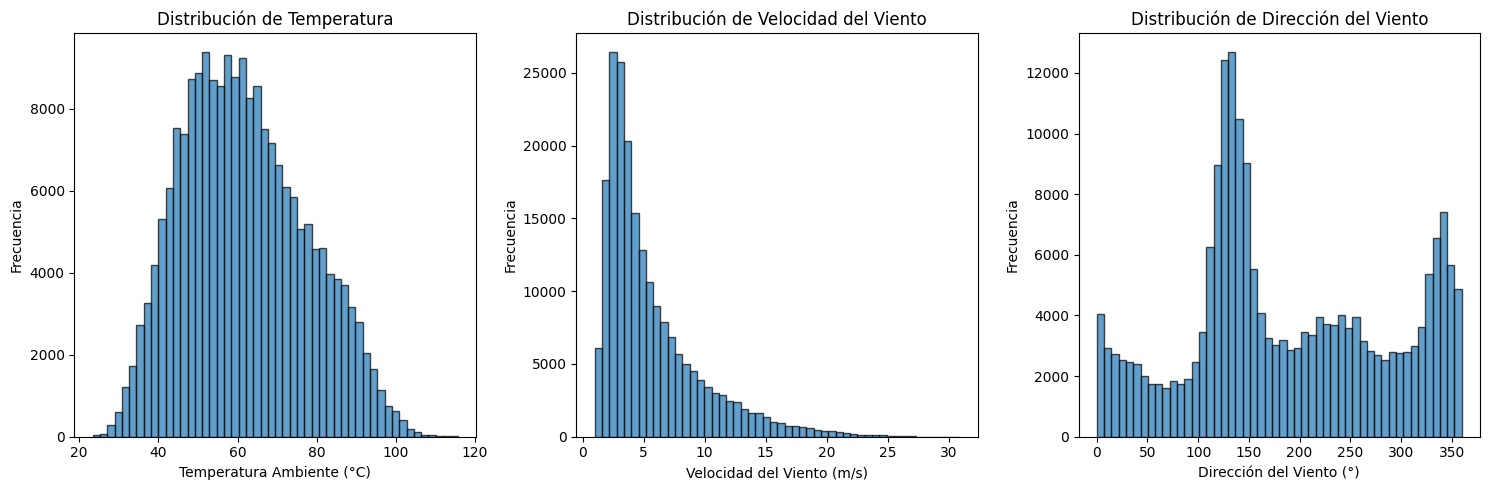

In [3]:
import matplotlib.pyplot as plt

# Configurar tamaño de las figuras
plt.figure(figsize=(15, 5))

# Histograma de temperatura ambiente
plt.subplot(1, 3, 1)
plt.hist(df_env["ambient_temperature_o_149575"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Temperatura Ambiente (°C)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Temperatura")

# Histograma de velocidad del viento
plt.subplot(1, 3, 2)
plt.hist(df_env["wind_speed_o_149576"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Velocidad del Viento (m/s)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Velocidad del Viento")

# Histograma de dirección del viento
plt.subplot(1, 3, 3)
plt.hist(df_env["wind_direction_o_149577"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Dirección del Viento (°)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Dirección del Viento")

plt.tight_layout()
plt.show()


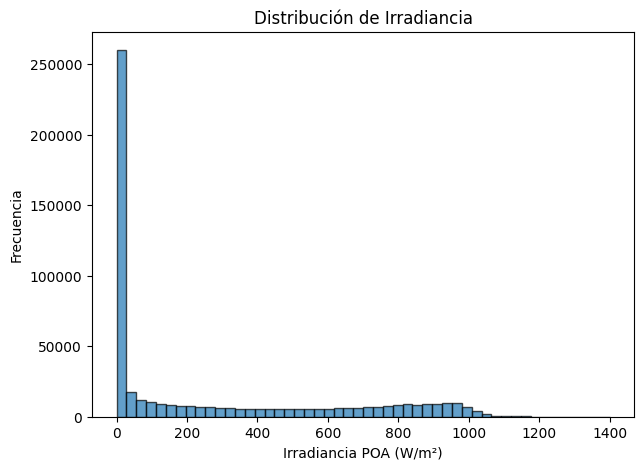

In [4]:
# Visualización de la distribución de la irradiancia
plt.figure(figsize=(7, 5))
plt.hist(df_irr["poa_irradiance_o_149574"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Irradiancia POA (W/m²)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Irradiancia")

plt.show()


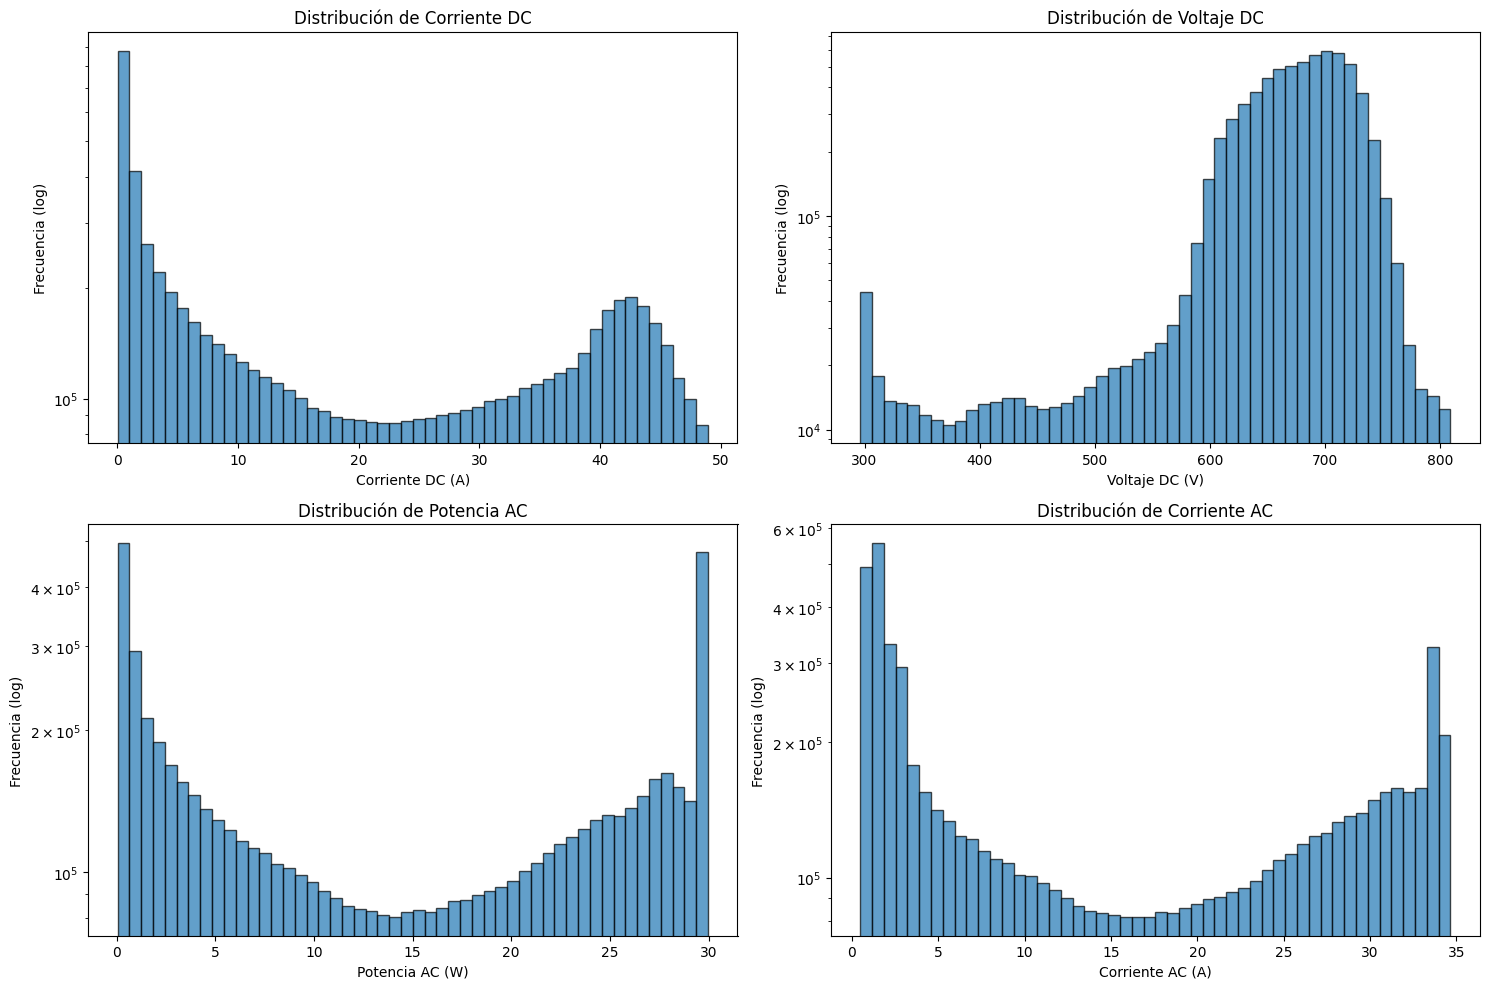

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Función para limpiar valores atípicos y eliminar ceros
def clean_data(data, lower_percentile=1, upper_percentile=99):
    data = data[data > 0]  # Eliminar ceros
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Crear la figura
plt.figure(figsize=(15, 10))

# Subplot 1: Histograma de Corriente DC con escala logarítmica
plt.subplot(2, 2, 1)
dc_current_data = df_elec.filter(like="dc_current").values.flatten()
dc_current_data = clean_data(dc_current_data)
plt.hist(dc_current_data, bins=50, edgecolor="black", alpha=0.7)
plt.yscale("log")  # Escala logarítmica
plt.xlabel("Corriente DC (A)")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de Corriente DC")

# Subplot 2: Histograma de Voltaje DC con escala logarítmica
plt.subplot(2, 2, 2)
dc_voltage_data = df_elec.filter(like="dc_voltage").values.flatten()
dc_voltage_data = clean_data(dc_voltage_data)
plt.hist(dc_voltage_data, bins=50, edgecolor="black", alpha=0.7)
plt.yscale("log")  # Escala logarítmica
plt.xlabel("Voltaje DC (V)")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de Voltaje DC")

# Subplot 3: Histograma de Potencia AC con escala logarítmica
plt.subplot(2, 2, 3)
ac_power_data = df_elec.filter(like="ac_power").values.flatten()
ac_power_data = clean_data(ac_power_data)
plt.hist(ac_power_data, bins=50, edgecolor="black", alpha=0.7)
plt.yscale("log")  # Escala logarítmica
plt.xlabel("Potencia AC (W)")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de Potencia AC")

# Subplot 4: Histograma de Corriente AC con escala logarítmica
plt.subplot(2, 2, 4)
ac_current_data = df_elec.filter(like="ac_current").values.flatten()
ac_current_data = clean_data(ac_current_data)
plt.hist(ac_current_data, bins=50, edgecolor="black", alpha=0.7)
plt.yscale("log")  # Escala logarítmica
plt.xlabel("Corriente AC (A)")
plt.ylabel("Frecuencia (log)")
plt.title("Distribución de Corriente AC")

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Función para detectar anomalías usando el método del rango intercuartil (IQR)
def detectar_anomalias_iqr(data, columna):
    Q1 = np.percentile(data[columna], 25)  # Primer cuartil
    Q3 = np.percentile(data[columna], 75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartil

    # Definir límites para valores atípicos (1.5 * IQR por debajo y por encima)
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores atípicos
    anomalias = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

    return anomalias

# Aplicar detección de anomalías a cada columna relevante
anomalias_temp = detectar_anomalias_iqr(df_env, "ambient_temperature_o_149575")
anomalias_viento = detectar_anomalias_iqr(df_env, "wind_speed_o_149576")
anomalias_dir_viento = detectar_anomalias_iqr(df_env, "wind_direction_o_149577")
anomalias_irradiancia = detectar_anomalias_iqr(df_irr, "poa_irradiance_o_149574")

# Aplicar detección de anomalías en los datos eléctricos
anomalias_corriente_dc = detectar_anomalias_iqr(df_elec, "inv_01_dc_current_inv_149579")
anomalias_voltaje_dc = detectar_anomalias_iqr(df_elec, "inv_01_dc_voltage_inv_149580")
anomalias_corriente_ac = detectar_anomalias_iqr(df_elec, "inv_01_ac_current_inv_149581")
anomalias_voltaje_ac = detectar_anomalias_iqr(df_elec, "inv_01_ac_voltage_inv_149582")
anomalias_potencia_ac = detectar_anomalias_iqr(df_elec, "inv_01_ac_power_inv_149583")

# Cantidad de anomalías encontradas
cantidad_anomalias = {
    "valores anómalos Temperatura": len(anomalias_temp),
    "valores anómalos Velocidad del viento": len(anomalias_viento),
    "valores anómalos Dirección del viento": len(anomalias_dir_viento),
    "valores anómalos Irradiancia": len(anomalias_irradiancia),
    "valores anómalos Corriente DC": len(anomalias_corriente_dc),
    "valores anómalos Voltaje DC": len(anomalias_voltaje_dc),
    "valores anómalos Corriente AC": len(anomalias_corriente_ac),
    "valores anómalos Voltaje AC": len(anomalias_voltaje_ac),
    "valores anómalos Potencia AC": len(anomalias_potencia_ac),
}

cantidad_anomalias


{'valores anómalos Temperatura': 128,
 'valores anómalos Velocidad del viento': 11096,
 'valores anómalos Dirección del viento': 0,
 'valores anómalos Irradiancia': 29,
 'valores anómalos Corriente DC': 58337,
 'valores anómalos Voltaje DC': 0,
 'valores anómalos Corriente AC': 38994,
 'valores anómalos Voltaje AC': 0,
 'valores anómalos Potencia AC': 47463}

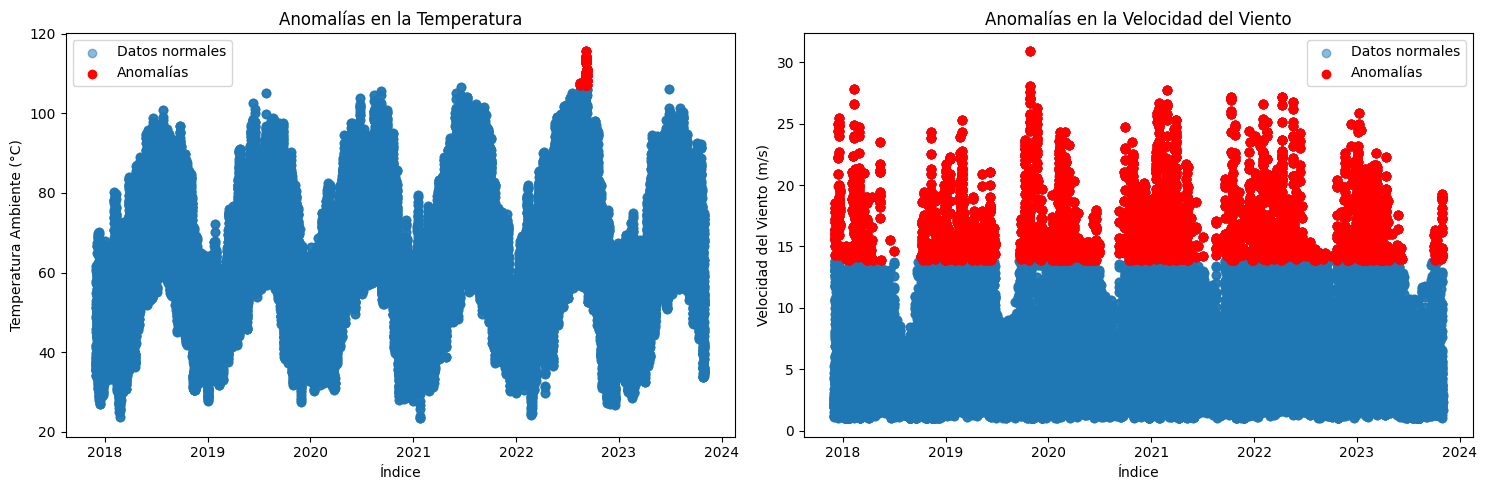

In [7]:
# Visualización de anomalías en Temperatura y Velocidad del Viento

plt.figure(figsize=(15, 5))

# Gráfico de anomalías en temperatura ambiente
plt.subplot(1, 2, 1)
plt.scatter(df_env.index, df_env["ambient_temperature_o_149575"], label="Datos normales", alpha=0.5)
plt.scatter(anomalias_temp.index, anomalias_temp["ambient_temperature_o_149575"], color='red', label="Anomalías")
plt.xlabel("Índice")
plt.ylabel("Temperatura Ambiente (°C)")
plt.title("Anomalías en la Temperatura")
plt.legend()

# Gráfico de anomalías en velocidad del viento
plt.subplot(1, 2, 2)
plt.scatter(df_env.index, df_env["wind_speed_o_149576"], label="Datos normales", alpha=0.5)
plt.scatter(anomalias_viento.index, anomalias_viento["wind_speed_o_149576"], color='red', label="Anomalías")
plt.xlabel("Índice")
plt.ylabel("Velocidad del Viento (m/s)")
plt.title("Anomalías en la Velocidad del Viento")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\ericv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


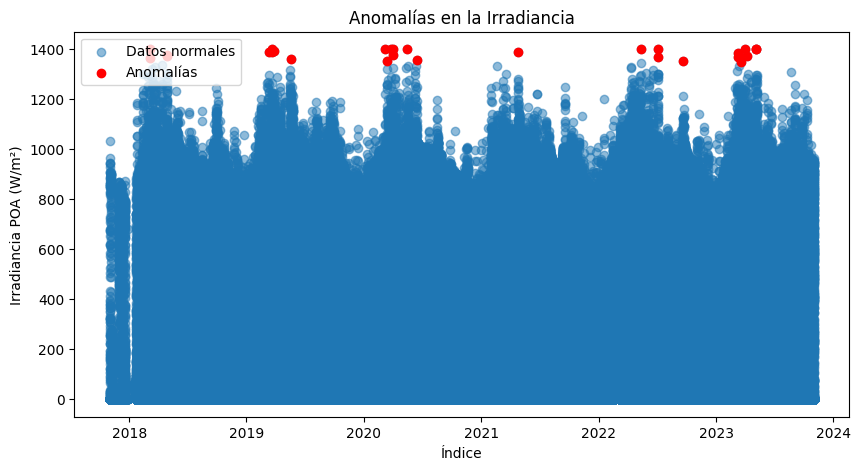

In [8]:
# Visualización de anomalías en Irradiancia

plt.figure(figsize=(10, 5))
plt.scatter(df_irr.index, df_irr["poa_irradiance_o_149574"], label="Datos normales", alpha=0.5)
plt.scatter(anomalias_irradiancia.index, anomalias_irradiancia["poa_irradiance_o_149574"], color='red', label="Anomalías")
plt.xlabel("Índice")
plt.ylabel("Irradiancia POA (W/m²)")
plt.title("Anomalías en la Irradiancia")
plt.legend()

plt.show()


C:\Users\ericv\AppData\Local\Temp\ipykernel_171728\3045755752.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


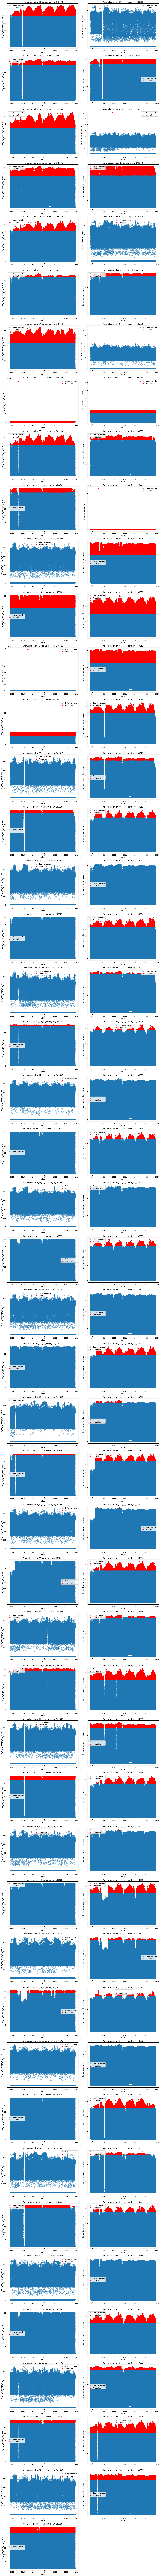

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Función para detectar anomalías con el método IQR
def detectar_anomalias_iqr(data, columna):
    Q1 = np.percentile(data[columna], 25)  # Primer cuartil
    Q3 = np.percentile(data[columna], 75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartil

    # Definir límites para valores atípicos (1.5 * IQR por debajo y por encima)
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores atípicos
    anomalias = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    return anomalias

# Lista de columnas relevantes (corriente, voltaje y potencia de los inversores)
columnas_relevantes = [col for col in df_elec.columns if "dc_current" in col or "dc_voltage" in col or "ac_current" in col or "ac_power" in col]

# Diccionario para almacenar anomalías detectadas
anomalias_dict = {}

# Detectar anomalías en cada columna relevante
for col in columnas_relevantes:
    anomalias_dict[col] = detectar_anomalias_iqr(df_elec, col)

# Número de subplots dinámicos
num_graficos = len(columnas_relevantes)
filas = (num_graficos // 2) + (num_graficos % 2)  # Para organizar 2 gráficos por fila

# Configurar la figura con subplots dinámicos
plt.figure(figsize=(15, 5 * filas))

# Crear gráficos dinámicos para cada variable
for i, col in enumerate(columnas_relevantes, 1):
    plt.subplot(filas, 2, i)
    plt.scatter(df_elec.index, df_elec[col], label="Datos normales", alpha=0.5)
    plt.scatter(anomalias_dict[col].index, anomalias_dict[col][col], color='red', label="Anomalías")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.title(f"Anomalías en {col}")
    plt.legend()

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()
